# EDA and normalizing features

In [40]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/train.csv')

# check the unique values of the ticket column
data['Ticket'].unique()

#drop the columns that are not needed
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

#check the data for null values
data.isnull().sum()

#gett the unique values of the Embarked column
data['Embarked'].unique()

#drop the rows with null values for Embarked
data.dropna(subset=['Embarked'], inplace=True)

#replace the embarked values with one hot encoding
data = pd.get_dummies(data, columns=['Embarked'])


#convert the sex data to numeric
sex_mapping = {'male': 0, 'female': 1}

data['Sex'] = data['Sex'].map(sex_mapping)


#replace upper and lower outliers for Fare, SibSp, Parch, Age
data['Fare'] = data['Fare'].clip(lower=data['Fare'].quantile(0.01),   upper=data['Fare'].quantile(0.99))
data['SibSp'] = data['SibSp'].clip(lower=data['SibSp'].quantile(0.01),upper=data['SibSp'].quantile(0.99))
data['Parch'] = data['Parch'].clip(lower=data['Parch'].quantile(0.01),upper=data['Parch'].quantile(0.99))
data['Age'] = data['Age'].clip(lower=data['Age'].quantile(0.01), upper=data['Age'].quantile(0.99))



#impute the null values for Age
data['Age'].fillna(data['Age'].mean(), inplace=True)

columns_to_normalize = ['Fare','SibSp','Parch']
#check the skew and kurtosis of the data
print('Skewness and Kurtosis of the data before normalization')
print(data[columns_to_normalize].skew())
print(data[columns_to_normalize].kurtosis())
print('-----------------------------------------------')
print('Skewness and Kurtosis of the data after normalization')
#normalize the data
data[columns_to_normalize] = np.log1p(data[columns_to_normalize])
print(data[columns_to_normalize].skew())
print(data[columns_to_normalize].kurtosis())


Skewness and Kurtosis of the data before normalization
Fare     3.129052
SibSp    2.695061
Parch    2.288069
dtype: float64
Fare     11.131621
SibSp     7.929396
Parch     5.493691
dtype: float64
-----------------------------------------------
Skewness and Kurtosis of the data after normalization
Fare     0.340286
SibSp    1.506620
Parch    1.604583
dtype: float64
Fare     0.824305
SibSp    1.520820
Parch    1.248586
dtype: float64


In [44]:

# use the data for training
data.to_csv('../data/train_cleaned.csv', index=False)

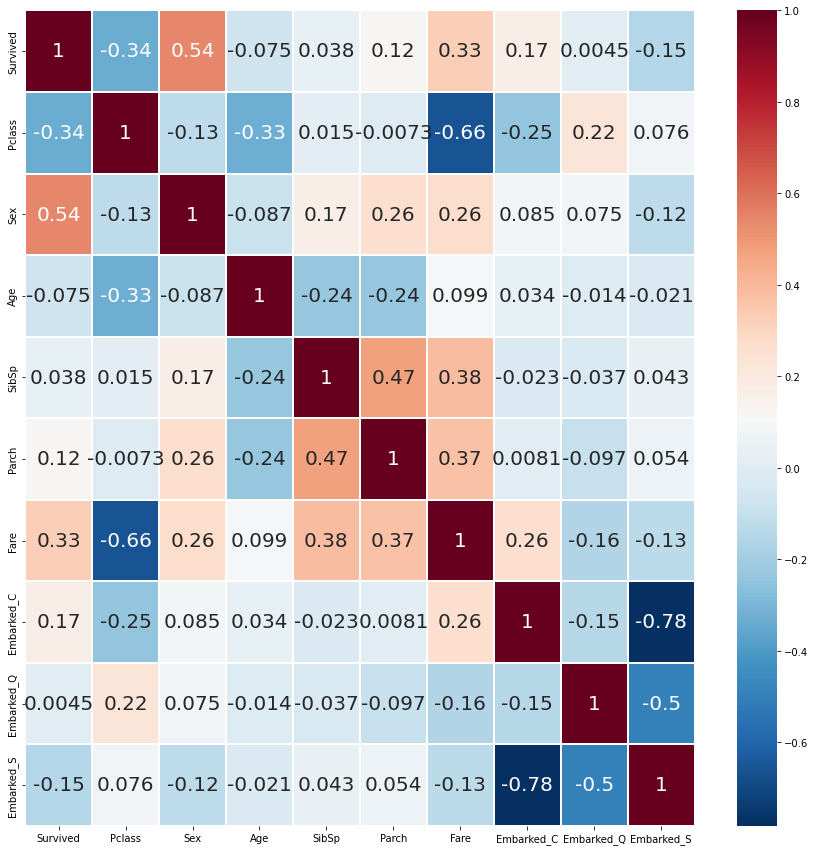

In [43]:
#get the heatmap of the data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r', linewidths=0.2, annot_kws={'size': 20})
plt.show()


# Findings

From this correlation matrix it appears that the lower the Pclass, the higher the survival rate. This is because the lower the Pclass, the higher the social status of the passenger. The higher the social status, the more likely they were to survive.

Similarly, the higher the Fare, the higher the survival rate. This is because the higher the Fare, the higher the social status of the passenger. The higher the social status, the more likely they were to survive.

Similarly, women are more liekly to be saved

# Model Building

This section contains a group of models that I used to predict the titanic surviviors

- Model 1: Logistic Regression

- Model 2: Random Forest

- Model 3: SVM

- Model 4: MLP

## Some other models to try

- Model 4: KNN, Model 5: Naive Bayes, Model 6: Decision Tree, Model 7: XGBoost, Model 8: AdaBoost, Model 9: Gradient Boosting, Model 10: Bagging



## Model 1: Logistic Regression